# Technique to handle imbalance dataset - Undersampling

### Undersampling techniques in machine learning balance imbalanced datasets by reducing the majority class samples

- Using random undersampling method

In [8]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers, cluster_std=cluster_std, random_state=0)

In [3]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from imblearn.under_sampling import RandomUnderSampler

# Applying Random Over Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

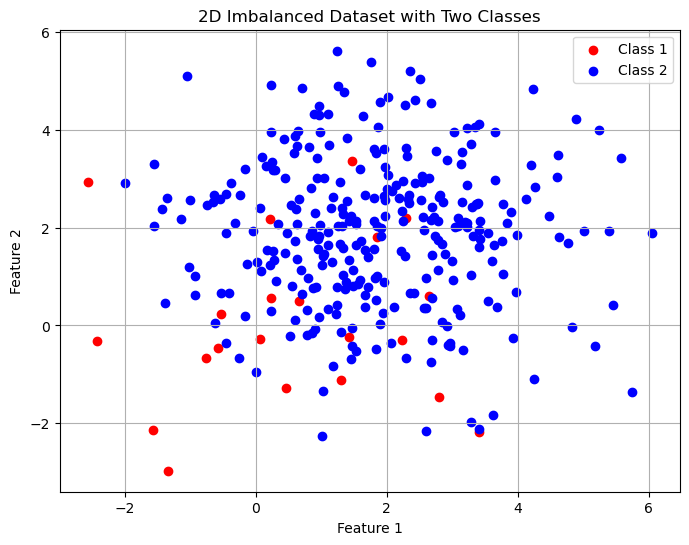

In [6]:
# Plotting (before resampled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

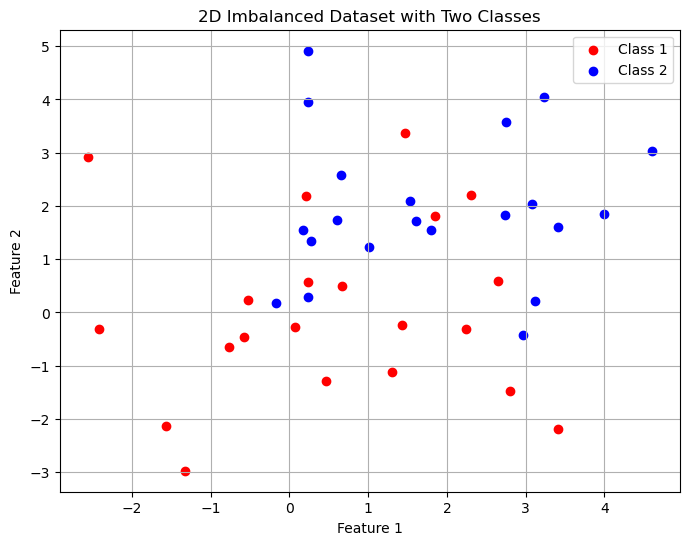

In [7]:
# Plotting (after resampled)
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

In [12]:
# shapes of X before and after resampled

print(f'Shape of X before resampled: {X_train.shape}')
print(f'Shape of X before resampled: {X_resampled.shape}')

Shape of X before resampled: (320, 2)
Shape of X before resampled: (42, 2)


In [13]:
pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64

In [14]:
pd.Series(y_resampled).value_counts()

0    21
1    21
Name: count, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize and train RandomForest classifier on resampled data
classifier_rus = LogisticRegression()
classifier_rus.fit(X_resampled, y_resampled)

LogisticRegression()

In [16]:
# Predict test set
y_pred_rus = classifier_rus.predict(X_test)
y_proba_rus = classifier_rus.predict_proba(X_test)[:, 1]

In [18]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_rus))

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80



In [19]:
# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Over Sampling):", roc_auc_score(y_test, y_proba_rus))

ROC AUC Score (With Over Sampling): 0.9375


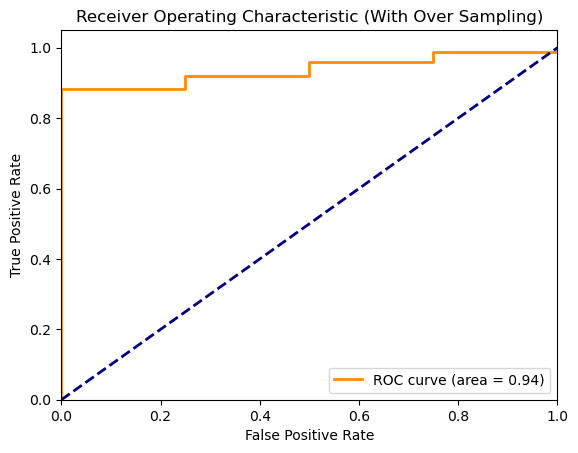

In [20]:
# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Over Sampling)')
plt.legend(loc="lower right")

In [21]:
# Function to plot decision boundaries for resampled data
def plot_decision_boundaries_ros(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With Over Sampling)")

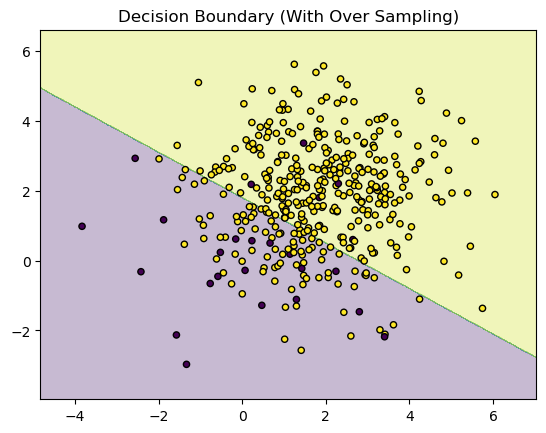

In [22]:
# Plot decision boundary for resampled data
plot_decision_boundaries_ros(X, y, classifier_rus)